In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

from training_utils import *

2023-06-16 10:08:18.239419: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data = np.load("4_45_7715.npy", allow_pickle=True)[None][0]
data = data["4_45_7710"]
dataset = np.load("../datasets/1-22p5_1p5_T4_10.npz")

In [50]:
t = (data["t"] - data["t"][7])[7:]*1000
v0 = data["v0"][7:]
n0 = data["n0"][7:]
v1 = data["v1"][7:]
n1 = data["n1"][7:]
v2 = data["v2"][7:]
n2 = data["n2"][7:]
p = (data["p"] - data["p"][0,0])[7:]*1E-6
PLAG = dataset["PLAG"][:16]
num_el = len(p[0,:])
plag = np.zeros_like(p)
for i in range(num_el):
    plag[:,i] = PLAG[:,1]

print(data["t"][7])

0.0335


In [51]:
train_data = np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()])
lis = list()
for i in range(len(train_data)):
    if np.isfinite(train_data[i,-1]):
        lis.append(i)
train_data = np.array(train_data[lis])
norms = np.linalg.norm(train_data, np.inf, axis=0)
for i in range(len(norms)):
    train_data[:,i] /= norms[i]
np.random.shuffle(train_data)
print(np.all(np.isfinite(train_data)))

True


In [52]:
#np.savez_compressed("data",t=t, v0=v0, n0=n0,v1=v1, n1=n1,v2=v2, n2=n2, p=p, plag=plag, norms=norms, train=train_data)

#2

In [3]:
data = np.load("data.npz")

with gzip.open("para.pkl.gz") as f:
    para1 = pickle.load(f)
with gzip.open("para2.pkl.gz") as f:
    para2 = pickle.load(f)
with gzip.open("para3.pkl.gz") as f:
    para3 = pickle.load(f)
with gzip.open("para4.pkl.gz") as f:
    para4 = pickle.load(f)

2023-06-16 10:08:20.195307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-16 10:08:20.241992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-16 10:08:20.242035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-16 10:08:20.245211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-16 10:08:20.245268: I tensorflow/compile

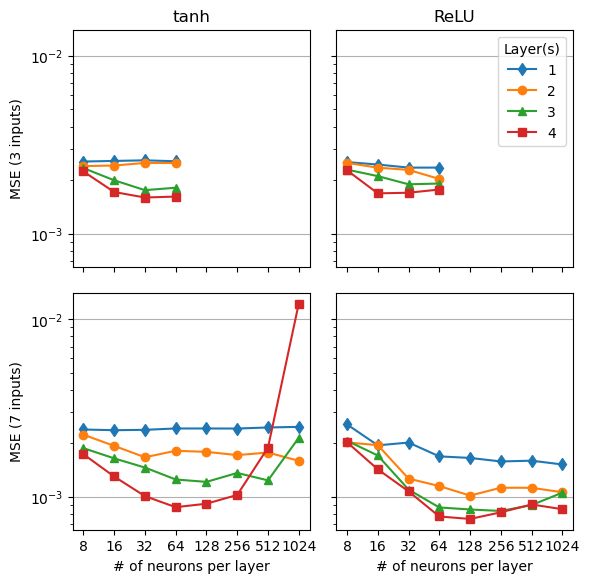

In [54]:
x_dict = {8:0, 16:1, 32:2, 64:3}
x = ["8","16","32","64"]
y_tanh = np.zeros((4,4))
y_relu = np.zeros((4,4))

for k,v in para1["history"].items():
    paras = k.split("_")
    arr = y_tanh
    if paras[0] == "relu":
        arr = y_relu
    l = int(paras[1])
    n = int(paras[2])
    arr[l-1, x_dict[n]] = np.min(v["val_loss"])

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(6,6), sharey=True, sharex=True, subplot_kw=dict(box_aspect=1, yscale="log"))
markers = ["d", "o", "^", "s"]
ax1.set_title("tanh")
for i in range(len(y_tanh)):
    ax1.plot(x, y_tanh[i], marker=markers[i], label=f"{i+1}")

ax1.grid(axis='y')
ax1.set_ylabel("MSE loss")
ax1.set_axisbelow(True)
ax1.set_ylabel("MSE (3 inputs)")

ax2.set_title("ReLU")
for i in range(len(y_relu)):
    ax2.plot(x, y_relu[i], marker=markers[i], label=f"{i+1}")
ax2.legend(title="Layer(s)")
ax2.grid(axis='y')
ax2.set_axisbelow(True)


#fig.tight_layout()
#fig.savefig(f"fsi_para1.pdf", bbox_inches="tight")

#plt.show()

x_dict = {8:0, 16:1, 32:2, 64:3, 128:4, 256:5, 512:6, 1028:7}
x = ["8","16","32","64", "128", "256", "512", "1024"]
y_tanh = np.zeros((4,8))
y_relu = np.zeros((4,8))

for k,v in para2["history"].items():
    paras = k.split("_")
    arr = y_tanh
    if paras[0] == "relu":
        arr = y_relu
    l = int(paras[1])
    n = int(paras[2])
    arr[l-1, x_dict[n]] = np.min(v["val_loss"])

for k,v in para3["history"].items():
    paras = k.split("_")
    arr = y_tanh
    if paras[0] == "relu":
        arr = y_relu
    l = int(paras[1])
    n = int(paras[2])
    arr[l-1, x_dict[n]] = np.min(v["val_loss"])

#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True,subplot_kw=dict(box_aspect=1, xlabel="# of neurons per layer", yscale="log"))
markers = ["d", "o", "^", "s"]

for i in range(len(y_tanh)):
    ax3.plot(x, y_tanh[i], marker=markers[i], label=f"{i+1}")

ax3.grid(axis='y')
ax3.set_ylabel("MSE loss")
ax3.set_axisbelow(True)
ax3.set_xlabel("# of neurons per layer")
ax3.set_ylabel("MSE (7 inputs)")

for i in range(len(y_relu)):
    ax4.plot(x, y_relu[i], marker=markers[i], label=f"{i+1}")
#ax4.legend(title="Layer(s)")
ax4.grid(axis='y')
ax4.set_axisbelow(True)
ax4.set_xlabel("# of neurons per layer")

fig.tight_layout()
fig.savefig(f"fsi_para.pdf", bbox_inches="tight")

plt.show()

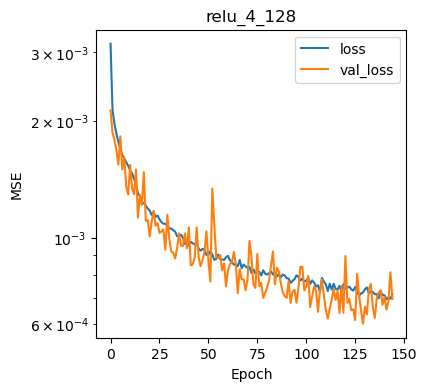

In [55]:


fig = plt.figure(figsize=(4,4))
for k,v in para4["history"].items():
    plt.plot(v,label=k)
plt.legend()
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("relu_4_128")
plt.savefig("relu_4_128.pdf",bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 16ms/step


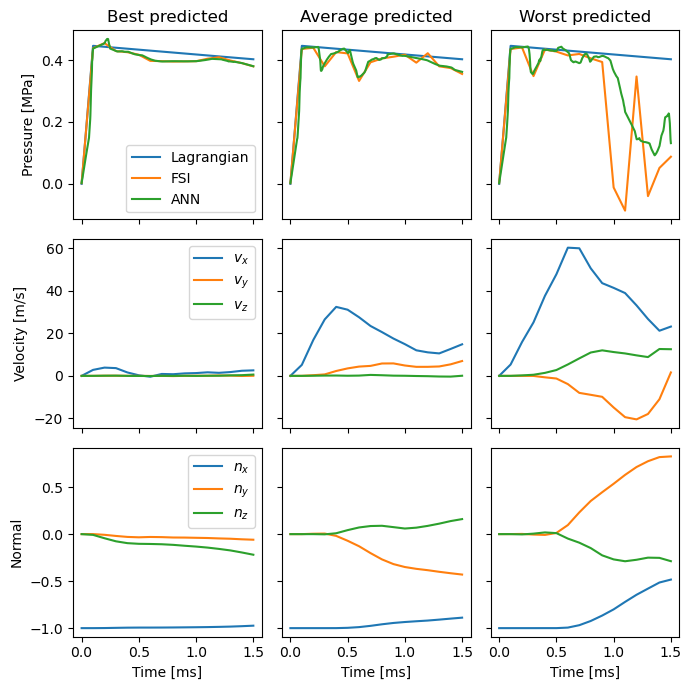

In [56]:
model = para4["model"]

in_data = np.transpose([plag.flatten(), n0.flatten(), v0.flatten(), n1.flatten(), v1.flatten(),n2.flatten(), v2.flatten(), p.flatten()])

for i in range(len(norms)):
    in_data[:,i] /= norms[i]

out = model.predict(in_data[:,:-1], batch_size=len(in_data))

out = out.reshape(plag.shape)*norms[-1]
e = p - out
ee = np.array([(np.abs(e[:,i])).mean() for i in range(len(e[0]))])

lis = list()
for i in range(len(ee)):
    if np.isfinite(ee[i]):
        lis.append(i)
ee = np.array(ee[lis])

t_int = np.linspace(t[0], t[-1], 1000)
eid = ee.argmin()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

fig, ((ax1,axa, ax2),(ax3,axb,ax4),(ax5,axc,ax6)) = plt.subplots(3,3,figsize=(7,7), sharex=True, sharey="row", subplot_kw=dict(box_aspect=1, xlabel="Time [ms]"))
ax1.set_title(f"Best predicted")
ax1.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax1.plot(t,p[:,lis][:,eid], label="FSI")
ax1.plot(t_int,out.flatten(), label="ANN")
ax1.legend()
ax1.set_ylabel("Pressure [MPa]")

ax3.set_ylabel("Velocity [m/s]")
ax3.plot(t,v0[:,lis][:,eid], label="$v_x$")
ax3.plot(t,v1[:,lis][:,eid], label="$v_y$")
ax3.plot(t,v2[:,lis][:,eid], label="$v_z$")
ax3.legend()

ax5.set_ylabel("Normal")
ax5.plot(t,n0[:,lis][:,eid], label="$n_x$")
ax5.plot(t,n1[:,lis][:,eid], label="$n_y$")
ax5.plot(t,n2[:,lis][:,eid], label="$n_z$")
ax5.legend()

eid = ee.argmax()
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

ax2.set_title(f"Worst predicted")
ax2.plot(t,plag[:,lis][:,eid], label="Lagrangian")
ax2.plot(t,p[:,lis][:,eid], label="FSI")
ax2.plot(t_int,out.flatten(), label="ANN")

ax4.plot(t,v0[:,lis][:,eid])
ax4.plot(t,v1[:,lis][:,eid])
ax4.plot(t,v2[:,lis][:,eid])

ax6.plot(t,n0[:,lis][:,eid])
ax6.plot(t,n1[:,lis][:,eid])
ax6.plot(t,n2[:,lis][:,eid])


eid = np.argmin(np.abs(ee-ee.mean()))
plag_int = np.interp(t_int, t, plag[:,lis][:,eid])
n0_int = np.interp(t_int, t, n0[:,lis][:,eid])
v0_int = np.interp(t_int, t, v0[:,lis][:,eid])
n1_int = np.interp(t_int, t, n1[:,lis][:,eid])
v1_int = np.interp(t_int, t, v1[:,lis][:,eid])
n2_int = np.interp(t_int, t, n2[:,lis][:,eid])
v2_int = np.interp(t_int, t, v2[:,lis][:,eid])
p_int = np.interp(t_int, t, p[:,lis][:,eid])

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]

axa.set_title(f"Average predicted")
axa.plot(t,plag[:,lis][:,eid], label="Lagrangian")
axa.plot(t,p[:,lis][:,eid], label="FSI")
axa.plot(t_int,out.flatten(), label="ANN")

axb.plot(t,v0[:,lis][:,eid])
axb.plot(t,v1[:,lis][:,eid])
axb.plot(t,v2[:,lis][:,eid])

axc.plot(t,n0[:,lis][:,eid])
axc.plot(t,n1[:,lis][:,eid])
axc.plot(t,n2[:,lis][:,eid])

fig.tight_layout()
fig.savefig(f"best_worst.pdf", bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 16ms/step


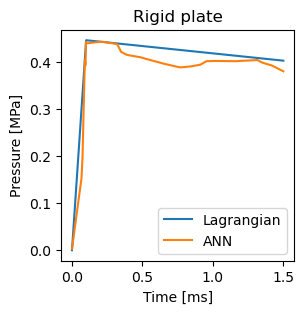

In [57]:
plag_int = np.interp(t_int, t, plag[:,lis][:,0])
n0_int = np.ones_like(plag_int)*-1
v0_int = np.zeros_like(plag_int)
n1_int = np.zeros_like(plag_int)
v1_int = np.zeros_like(plag_int)
n2_int = np.zeros_like(plag_int)
v2_int = np.zeros_like(plag_int)
p_int = np.zeros_like(plag_int)

in_data_int = np.transpose([plag_int, n0_int, v0_int, n1_int, v1_int,n2_int, v2_int, p_int])

for i in range(len(norms)):
    in_data_int[:,i] /= norms[i]

out = model.predict(in_data_int[:,:-1], batch_size=len(in_data_int))*norms[-1]


fig = plt.figure(figsize=(3,3))
plt.plot(t_int,plag_int, label="Lagrangian")
plt.plot(t_int,out.flatten(), label="ANN")
plt.legend()
plt.xlabel("Time [ms]")
plt.ylabel("Pressure [MPa]")
plt.title("Rigid plate")
fig.savefig(f"rigid.pdf", bbox_inches="tight")
plt.show()

In [58]:
maxes = list()

for i in range(len(n0[0,lis])):
    maxes.append(n0[:,lis][:,i].max())

eid = np.argmax(maxes)
print(eid)

3118


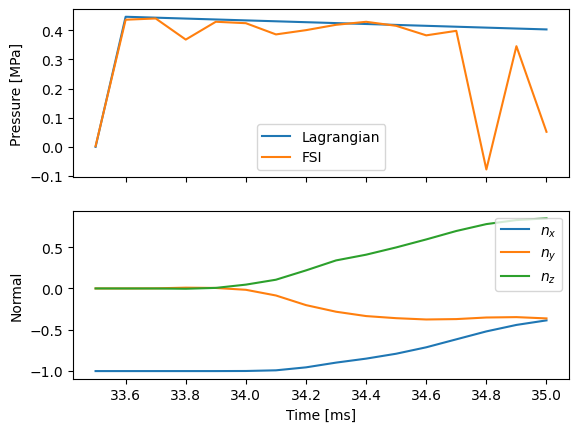

In [59]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, sharex=True)
eid = 3118
ax1.plot(t+33.5, plag[:,lis][:,eid], label="Lagrangian")
ax1.plot(t+33.5, p[:,lis][:,eid], label="FSI")
ax1.legend()
ax1.set_ylabel("Pressure [MPa]")

ax2.plot(t+33.5, n0[:,lis][:,eid], label="$n_x$")
ax2.plot(t+33.5, n1[:,lis][:,eid], label="$n_y$")
ax2.plot(t+33.5, n2[:,lis][:,eid], label="$n_z$")
ax2.set_ylabel("Normal")
ax2.set_xlabel("Time [ms]")
ax2.legend()
plt.show()

In [4]:
model = para2["models"]["relu_3_64"]
model.save("model_3_64.keras")
to_fortran_from_model("model_3_64.keras")

In [13]:
dat = np.load("data.npz")
1/dat["norms"]

array([2.24115081, 1.        , 0.01406321, 1.18809717, 0.03870478,
       1.13308028, 0.03292994, 1.98988343])